Explore Data

In [27]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Fintech_TFS\week_3_task\notebooks\data\transaction_data.csv")

df.head(10)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
6,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
8,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
9,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom


Check info and missing data

In [28]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB
None
UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64


Feature Engineering

In [29]:
print(df.columns)

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'],
      dtype='object')


In [30]:
df.rename(columns={'TransactionTime': 'timestamp'}, inplace=True)
df.rename(columns={'CostPerItem': 'amount'}, inplace=True)

print(df.head(5))

   UserId  TransactionId                     timestamp  ItemCode  \
0  278166        6355745  Sat Feb 02 12:50:00 IST 2019    465549   
1  337701        6283376  Wed Dec 26 09:06:00 IST 2018    482370   
2  267099        6385599  Fri Feb 15 09:45:00 IST 2019    490728   
3  380478        6044973  Fri Jun 22 07:14:00 IST 2018    459186   
4      -1        6143225  Mon Sep 10 11:58:00 IST 2018   1733592   

                     ItemDescription  NumberOfItemsPurchased  amount  \
0   FAMILY ALBUM WHITE PICTURE FRAME                       6   11.73   
1              LONDON BUS COFFEE MUG                       3    3.52   
2  SET 12 COLOUR PENCILS DOLLY GIRL                       72    0.90   
3        UNION JACK FLAG LUGGAGE TAG                       3    1.73   
4                WASHROOM METAL SIGN                       3    3.40   

          Country  
0  United Kingdom  
1  United Kingdom  
2          France  
3  United Kingdom  
4  United Kingdom  


In [31]:
import numpy as np

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df['log_amount'] = np.log1p(df['amount']) #log transform ( neutralizes outliers)

df['customer_transaction_count'] = df.groupby('UserId')['UserId'].transform('count') #transaction per user

df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_21468\2228289122.py:3: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['timestamp'] = pd.to_datetime(df['timestamp'])
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,UserId,TransactionId,timestamp,ItemCode,ItemDescription,NumberOfItemsPurchased,amount,Country,hour,day_of_week,is_weekend,log_amount,customer_transaction_count,is_night
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,12,5,1,2.543961,286,0
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,9,2,0,1.508512,454,0
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,9,4,0,0.641854,84,0
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,7,4,0,1.004302,2568,0
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,11,0,0,1.481605,270160,0


In [32]:
print(df.shape)

(1083818, 14)


Risk Score

In [33]:
df_sample = df.sample(n=25, random_state=42).copy()

def risk_score(row, df_subset):
    score = 0

    if row['log_amount'] > np.percentile(df_subset['log_amount'], 90):
        score += 3

    if row['is_night'] == 1:
        score += 2

    if row['is_weekend'] == 1:
        score += 1

    if row['customer_transaction_count'] > np.percentile(df_subset['customer_transaction_count'], 90):
        score += 4

    return score

df_sample['risk_score'] = df_sample.apply(lambda row: risk_score(row, df_sample), axis=1)

df_sample[['TransactionId', 'amount', 'risk_score']].sort_values(by='risk_score', ascending=False).head(10)


,TransactionId,amount,risk_score
143293,5909541,3.52,3
1030711,6391253,22.95,3
992042,6154038,117.30,3
1072964,6157756,14.90,1
1009758,5984979,4.55,1
755586,5927647,5.81,1
206112,5940253,1.73,1
779460,5909640,1.77,1
1052105,6163960,2.88,1
412949,6339333,2.28,1


Risk Score Trend

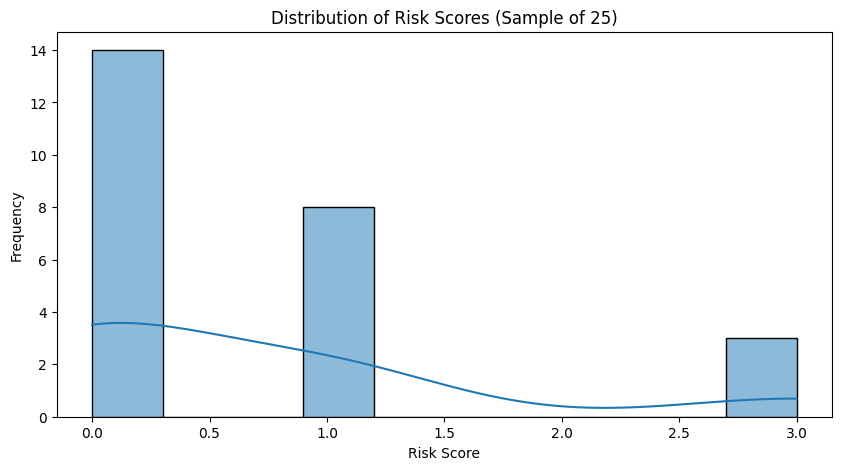

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_sample['risk_score'], bins=10, kde=True)
plt.title('Distribution of Risk Scores (Sample of 25)')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


High Risk transaction (/hour)

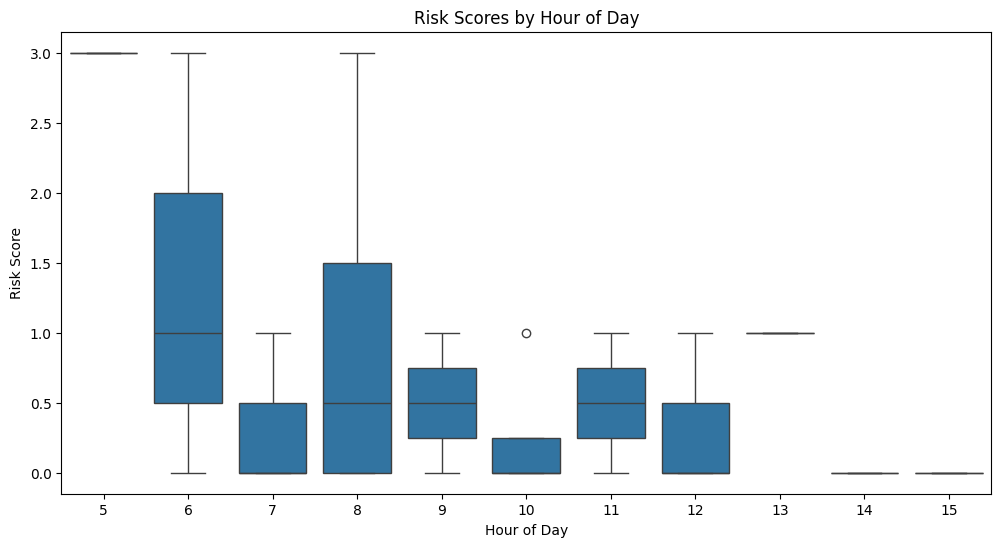

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_sample['hour'], y=df_sample['risk_score'])
plt.title('Risk Scores by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Risk Score')
plt.show()

High Risk Identification

In [36]:
high_risk_threshold = 4
high_risk_transactions = df_sample[df_sample['risk_score'] >= high_risk_threshold]

print(f"Total high-risk transactions: {len(high_risk_transactions)}")
high_risk_transactions[['TransactionId', 'amount', 'risk_score']]

Total high-risk transactions: 0


,TransactionId,amount,risk_score
